# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если набрано как минимум 2 балла из 10.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект:
- заполняете данный ноутбук
- создаете приватный репозиторий в GitHub
- добавляете в него проверяющего
- загружаете заполненный ноутбук в отдельную ветку
- создаете MR и добавляете проверяющих вне зависимости от того чьи семинары вы посещали
    `@boyarnikov`
    `@KatyaProkhorchuk`

**Проверяющие не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

## 1. Данные (2 балла)

Скачиваем данные для работы:

In [ ]:
%pip install gdown


In [ ]:
!gdown 1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM

Начнем с необходимых приготовлений.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла `coins.csv`. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [ ]:
coins = pd.read_csv("coins.csv", index_col='date')

Посмотрим что получилось

In [ ]:
coins.head(4)

Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [ ]:
coins['name'].nunique()

### 2. За какой период данные мы имеем? (0.4 балла)

In [ ]:
print(coins.reset_index()["date"].min(), "-", coins.reset_index()["date"].max())

### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

Проверим наличие пропусков:

In [ ]:
coins.info

In [ ]:
coins.isnull().sum()

В каких монетах есть пропуски:

In [ ]:
coins[coins.isnull().any(axis=1)]["name"].value_counts( )

Заметим, что больше половины пропусков приходится на три монеты. Проверим, сколько транзакций в них без пропусков:

In [ ]:
print("Augur","\n","Транзакции с пропусками: ",(coins[coins.isnull().any(axis=1)]["name"] == "Augur").sum(), '\n', "Транзакций всего: ", (coins["name"] == "Augur").sum())

In [ ]:
print("Stellar","\n","Транзакции с пропусками: ",(coins[coins.isnull().any(axis=1)]["name"] == "Stellar").sum(), '\n', "Транзакций всего: ", (coins["name"] == "Stellar").sum())

In [ ]:
print("VeChain","\n","Транзакции с пропусками: ",(coins[coins.isnull().any(axis=1)]["name"] == "VeChain").sum(), '\n', "Транзакций всего: ", (coins["name"] == "VeChain").sum())

In [ ]:
Для сравнения рассмотрим монету из конца списка:

In [ ]:
print("Gnosis","\n","Транзакции с пропусками: ",(coins[coins.isnull().any(axis=1)]["name"] == "Gnosis").sum(), '\n', "Транзакций всего: ", (coins["name"] == "Gnosis").sum())

Возможно, пропуски связаны с архитектурой блокчейна и возможностью скрывать данные о транзациях / адресах кошельков для монет из начала списка и ошибками / повреждениями БД для монет в конце списка.

### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [ ]:
coins[coins["price"] == coins["price"].max()]["name"]

### 5. У какой монеты самая высокая и самая низкая средняя капитализация (среднее арифметическое капитализаций за все доступные дни)? Постройте круговую диаграмму с долями. (0.5 балла)

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `candlestick_ohlc` (`from mplfinance.original_flavor import candlestick_ohlc`), но можно и без него.

In [ ]:
pip install --upgrade mplfinance


In [ ]:
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

In [ ]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    fig = plt.figure(figsize=(15, 10))
    ax1 = plt.subplot2grid((1,1), (0,0))
    ohlc_raw  = pd.DataFrame()

    filtered_by_date = coins.loc[start_date:end_date]

    ohlc_raw = filtered_by_date[filtered_by_date["symbol"] == symbol].reset_index()[['date','open', 'high', 'low', 'close', 'volume']]
    ohlc_raw['date'] = pd.to_datetime(ohlc_raw['date'])
    ohlc_raw['date'] = ohlc_raw['date'].map(mdates.date2num)

    ohlc = np.array(ohlc_raw)
    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax1.grid(True)

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'{symbol} price by day')
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()

Посмотрим, что получилось:

In [ ]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30')

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс).

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [ ]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):

    filtered_by_date = coins.loc[start_date:end_date].copy()
    filtered_by_date["pnd"] = filtered_by_date["high"] / filtered_by_date[["open", "close"]].max(axis=1)
    coin_data = filtered_by_date[filtered_by_date["symbol"] == symbol]
    result_row = coin_data["pnd"].idxmax()

    max_date = result_row
    max_pnd = coin_data.loc[result_row, "pnd"]

    print("Для монеты", symbol, "самый сильный pamp'n'dump был", max_date, ". Коэффициент pnd составил", max_pnd)

In [ ]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

Сравните эти значения для разных монет:

In [ ]:
find_most_severe_pump_and_dump(coins, symbol='ETH', start_date='2013-06-01', end_date='2018-06-01')
find_most_severe_pump_and_dump(coins, symbol='EOS', start_date='2013-06-01', end_date='2018-06-01')
find_most_severe_pump_and_dump(coins, symbol='LTC', start_date='2013-06-01', end_date='2018-06-01')
find_most_severe_pump_and_dump(coins, symbol='DOGE', start_date='2013-06-01', end_date='2018-06-01')

## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени.

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [ ]:
def compute_roi(coins, investments, start_date, end_date):
    filtered_by_date = coins.loc[start_date:end_date].copy()
    initial_value = 0
    for i in investments.values():
        initial_value += i
    amount_in_coins = {}
    for i in investments.keys():
        amount_in_coins[i] = investments[i]/filtered_by_date[filtered_by_date["symbol"] == i]["close"].iloc[0]
    result_value = 0
    for i in amount_in_coins.keys():
        result_value += amount_in_coins[i] * filtered_by_date[filtered_by_date["symbol"] == i]["close"].iloc[-1]
    ROI = (result_value - initial_value) / initial_value
    return ROI

In [ ]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

In [ ]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто:

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [ ]:
import matplotlib.dates as mdates


In [ ]:
def plot_bollinger_bands(coins, symbol, window, width):
    coins_filtered = coins[coins["symbol"] == symbol].copy()
    coins_filtered.index = pd.to_datetime(coins_filtered.index)
    coins_filtered['MA'] = coins_filtered['close'].rolling(window).mean()
    coins_filtered['STD'] = coins_filtered['close'].rolling(window).std()
    coins_filtered['Upper'] = coins_filtered['MA'] + width * coins_filtered['STD']
    coins_filtered['Lower'] = coins_filtered['MA'] - width * coins_filtered['STD']

    plt.figure(figsize=(12, 6))
    plt.plot(coins_filtered.index, coins_filtered['close'], label='Цена закрытия', color='blue', linewidth=0.8)
    plt.plot(coins_filtered.index, coins_filtered['MA'], label='Скользящее среднее', color='orange', linewidth=1.5)
    plt.plot(coins_filtered.index, coins_filtered['Upper'], label='Верхняя граница', color='green', linestyle='--')
    plt.plot(coins_filtered.index, coins_filtered['Lower'], label='Нижняя граница', color='red', linestyle='--')

    plt.title('Границы Боллинджера', fontsize=16)
    plt.xlabel('Дата', fontsize=12)
    plt.ylabel('Цена', fontsize=12)
    plt.legend(loc='best')
    plt.grid(alpha=0.3)
    plt.tight_layout()

    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=6))

    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()

In [ ]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

Правило Боллинджера плохо выполняется. В ситуации быстрого роста или падения график цены упирается в верхнюю или нижнюю границу, но не делает явного отскока каждый раз. В некоторых случаях он действительно канонично отскакивает, однако чаще всего разворачивается, не доходя до скользящей средней. Невозможно сделать вывод, когда цена развернулась по настоящему, а когда она продолжит расти.

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка.

При этом используйте данные начиная с 2017-07-01.

In [ ]:
def plot_coins_capitalizations(coins, symbols, start_date):
    filtered_by_date = coins.loc[start_date:].copy()
    filtered_by_date.index = pd.to_datetime(filtered_by_date.index)
    total_market_by_date = filtered_by_date.groupby(filtered_by_date.index)['market'].sum()

    plt.figure(figsize=(12, 12))
    plt.subplot(2, 1, 1)
    for i in symbols:
      plt.plot(filtered_by_date[filtered_by_date["symbol"] == i].index, filtered_by_date[filtered_by_date["symbol"] == i]['market'] / 1e9, label=i, linewidth=0.8)

    plt.title('Капитализация по монетам', fontsize=16)
    plt.ylabel('Сумма, млрд $', fontsize=12)
    plt.legend(loc='best')
    plt.grid(alpha=0.3)

    plt.subplot(2, 1, 2)
    for i in symbols:
      plt.plot(filtered_by_date[filtered_by_date["symbol"] == i].index, filtered_by_date[filtered_by_date["symbol"] == i]['market'] / total_market_by_date.loc[filtered_by_date[filtered_by_date["symbol"] == i].index] * 100, label=i, linewidth=0.8)

    plt.ylabel('Доля в капитализации, %', fontsize=12)
    plt.legend(loc='best')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

In [ ]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

Биткойн и Эфир друг друга зеркалят, остальные монеты вносят незначительный вклад. Изменение капитализации биткойна связано с колебанием его цены, при резком уменьшении цены капитализация биткойна снижается сильнее в абсолютных и относительных величинах. Снижение альткойнов не так значительно в абсолютных величинах, плюс снижение немного запаздывает, поэтому в относительных величинах после общего снижения капитализации относительная капитализация альткойнов растет. В абсолютных величинах все альткойны "ходят" за биткойном, потому что их покупают и продают только после того, как биткойн прорывает "информационный пузырь", привлекая очередным витком роста большое количество внешнего капитала от людей, которые до этого не находились на крипторынке.

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [ ]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    filtered_data = coins.loc[:date].copy()
    filtered_data.index = pd.to_datetime(filtered_data.index)

    total_market_by_date = filtered_data.groupby(filtered_data.index)['market'].sum()

    filtered_data['market_share'] = filtered_data['market'] / total_market_by_date.loc[filtered_data.index] * 100

    smoothed_shares = {}

    for symbol in symbols:
        coin_data = filtered_data[filtered_data['symbol'] == symbol]
        smoothed_share = coin_data['market_share'].rolling(window=window).mean().ewm(alpha=alpha).mean()
        smoothed_shares[symbol] = smoothed_share

    smoothed_shares_df = pd.DataFrame(smoothed_shares)

    correlation_matrix = smoothed_shares_df.corr()

    return correlation_matrix

In [ ]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').format(precision=2)

Довольно интересно ещё взглянуть на 2017-12-27:

In [ ]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').format(precision=2)

## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

In [ ]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)

    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show()

plot_moving_averages(
    coins=coins,
    symbol='BTC',
    leading_window=21,
    lagging_window=50,
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия/


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

Иными словами сравниваем 2 подхода:
- сразу в начальный момент времени купить крипты на все деньги - обычное инвестирование
- ждать подходящих моментов и покупать только в них равными порциями - стратегия

Считайте, что суммарное количество вложенных денег в обоих подходах одинаковое.

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [ ]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    coins.index = pd.to_datetime(coins.index)

    coin = coins[coins['symbol'] == symbol].loc[start_date:end_date].copy()
    price = coin['close']

    if price.empty:
        raise ValueError("Фильтрация по датам или символу вернула пустой набор данных.")

    leading_mean = price.rolling(window=lead_window).mean()
    lagging_mean = price.rolling(window=lag_window).mean()


    shifted_price = price.shift(1)
    multiplier = price / shifted_price

    buy_and_hold = multiplier.cumprod()

    strategy = pd.Series(1.0, index=price.index)
    position = 0
    for i in range(1, len(price)):

        if leading_mean.iloc[i - 1] > lagging_mean.iloc[i - 1] * (1 + threshold) and position == 0:
            position = 1
        elif leading_mean.iloc[i - 1] < lagging_mean.iloc[i - 1] * (1 - threshold) and position == 1:
            position = 0

        strategy.iloc[i] = strategy.iloc[i - 1] * (multiplier.iloc[i] if position == 1 else 1)


    fig, axs = plt.subplots(1, 2, figsize=(18, 6))

    axs[0].plot(buy_and_hold.index, buy_and_hold, label='Купи и держи', color='blue')
    axs[0].plot(strategy.index, strategy, label='Стратегия', color='orange')
    axs[0].set_title('Сравнение стратегий', fontsize=14)
    axs[0].set_ylabel('Накопленная прибыль', fontsize=12)
    axs[0].set_xlabel('Дата', fontsize=12)
    axs[0].legend(loc='best')
    axs[0].grid(alpha=0.3)

    axs[1].plot(price.index, price, label='Цена', color='blue', linewidth=0.8)
    axs[1].plot(leading_mean.index, leading_mean, label=f'Ведущее MA ({lead_window})', color='green')
    axs[1].plot(lagging_mean.index, lagging_mean, label=f'Запаздывающее MA ({lag_window})', color='red')
    axs[1].set_title('Цена и скользящие средние', fontsize=14)
    axs[1].set_ylabel('Цена', fontsize=12)
    axs[1].set_xlabel('Дата', fontsize=12)
    axs[1].legend(loc='best')
    axs[1].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

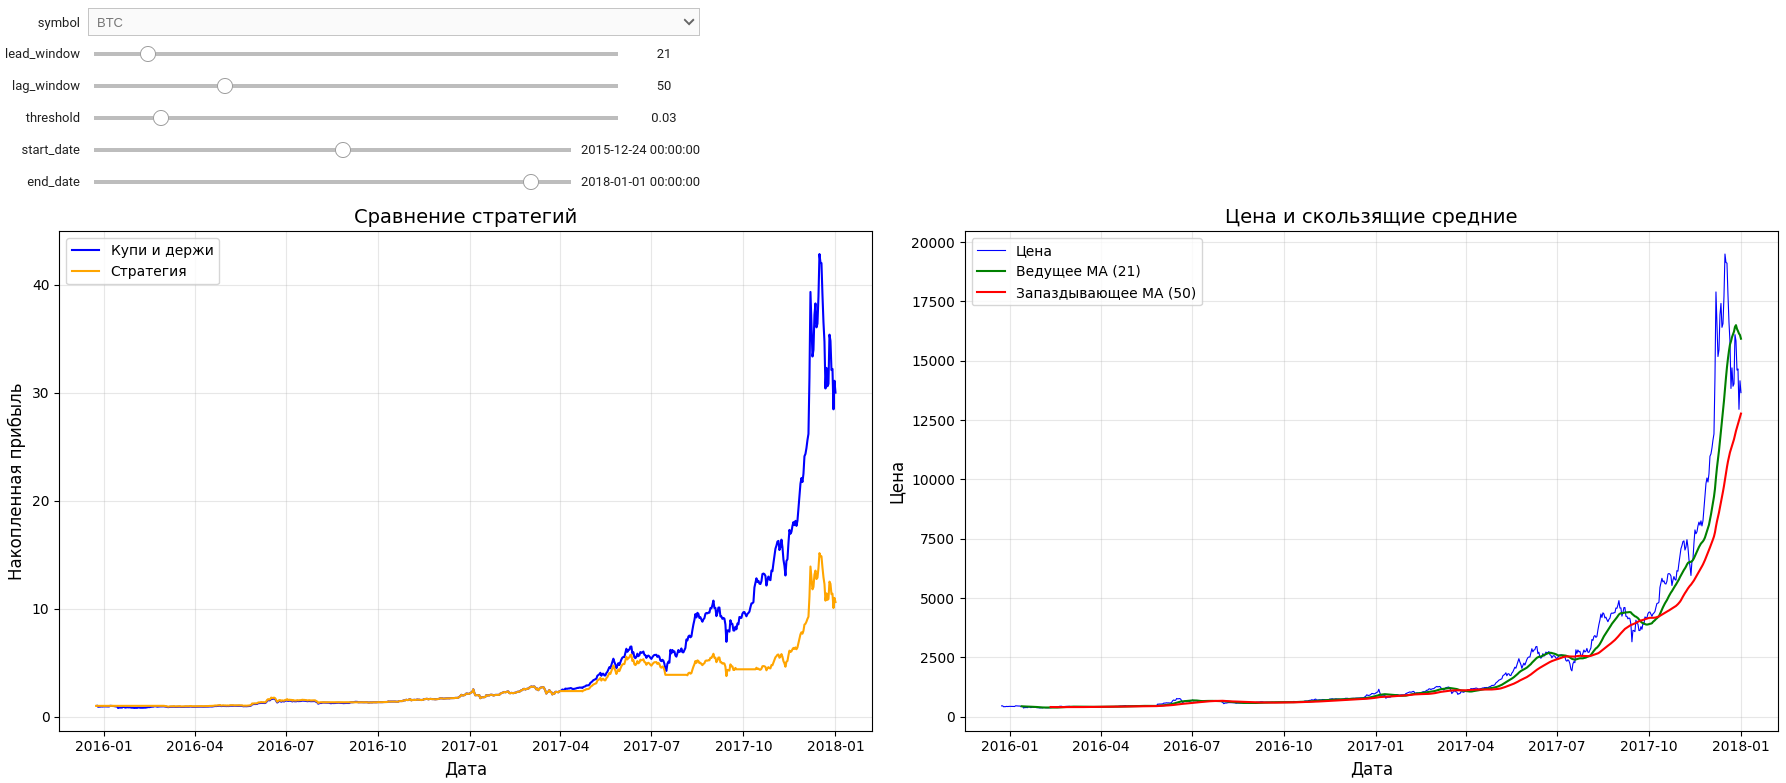

Стратегия купи и держи в подавляющем большинстве случаев не хуже стратегии, основанной на скользящих средних, следовательно не имеет смысла применять данную стратегию (впрочем, как и все остальные).

## 9. Отказ от ответственности

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.